<a href="https://colab.research.google.com/github/thanhtai150605/TTNT_Buoi4/blob/main/2001230767_NguyenThanhTai_Bai1%2C2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Tên các đỉnh (mở rộng để linh hoạt hơn)
NODE_NAMES = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
FILE_NAME = 'matrix.txt' # Tên file sau khi bạn đã upload lên Colab

# --- Hàm hỗ trợ Đọc File ---
def read_adjacency_matrix(file_path):
    """
    Đọc ma trận kề từ file .txt.
    """
    G = []
    try:
        with open(file_path, 'r') as f:
            for line in f:
                # Chuyển đổi mỗi dòng thành danh sách các số nguyên (0 hoặc 1)
                row = [int(x) for x in line.strip().split()]
                if row:
                    G.append(row)
        return G
    except FileNotFoundError:
        print(f"❌ Lỗi: Không tìm thấy file tại đường dẫn {file_path}. Vui lòng kiểm tra đã upload file chưa.")
        return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file: {e}")
        return None

# --- Hàm hỗ trợ Xử lý Đồ thị (Từ Bài 2) ---
def calculate_degrees(G):
    """ Tính bậc của mỗi đỉnh. """
    return [sum(row) for row in G]

def sort_vertices_by_degree(G, degrees):
    """ Sắp xếp các đỉnh theo thứ tự bậc giảm dần. """
    num_vertices = len(G)
    node_names = NODE_NAMES[:num_vertices]
    degree_info = []
    for i in range(num_vertices):
        degree_info.append((degrees[i], node_names[i], i))

    sorted_info = sorted(degree_info, key=lambda x: x[0], reverse=True)
    sorted_nodes = [info[1] for info in sorted_info]
    sorted_indices = [info[2] for info in sorted_info]

    return sorted_nodes, sorted_indices

def greedy_graph_coloring(G, sorted_indices):
    """ Thực hiện thuật toán tô màu tham lam. """
    num_vertices = len(G)
    node_names = NODE_NAMES[:num_vertices]
    AVAILABLE_COLORS = ["Blue", "Red", "Yellow", "Green", "Cyan", "Magenta", "Black"]
    theSolution = {}
    color_availability = {i: set() for i in range(num_vertices)} # Set of used colors for neighbor

    for i in sorted_indices:
        n_name = node_names[i]
        used_colors = color_availability[i]

        # Tìm màu khả dụng nhỏ nhất (đầu tiên)
        selected_color = None
        for color in AVAILABLE_COLORS:
            if color not in used_colors:
                selected_color = color
                break

        if selected_color is None:
             selected_color = f"Color_{len(used_colors) + 1}"

        theSolution[n_name] = selected_color

        # Loại bỏ màu đã dùng khỏi các đỉnh kề
        for j in range(num_vertices):
            if G[i][j] == 1:
                color_availability[j].add(selected_color)

    return theSolution

# ----------------- HÀM CHÍNH CHO BÀI 1 -----------------
def solve_bai1_colab(file_path):
    print(f"🛠️ Bắt đầu giải Bài 1: Đọc ma trận từ file '{file_path}'...")

    # 1. Đọc Ma trận
    G = read_adjacency_matrix(file_path)
    if G is None:
        return

    num_vertices = len(G)
    print(f"✅ Đã đọc thành công ma trận kề {num_vertices}x{num_vertices}.")

    # 2. Xử lý và Tô màu
    degrees = calculate_degrees(G)
    sorted_nodes, sorted_indices = sort_vertices_by_degree(G, degrees)
    result_coloring = greedy_graph_coloring(G, sorted_indices)

    # 3. In kết quả
    print("\n### KẾT QUẢ TÔ MÀU ĐỒ THỊ ###")
    print(f"Thứ tự tô màu (Bậc giảm dần): {sorted_nodes}")

    # In kết quả từng đỉnh và màu tương ứng
    for t, w in sorted(result_coloring.items()):
        print(f"Đỉnh {t} = {w}")

    print(f"\nTổng số màu đã sử dụng: {len(set(result_coloring.values()))}")


# Kích hoạt hàm chính:
solve_bai1_colab(FILE_NAME)

🛠️ Bắt đầu giải Bài 1: Đọc ma trận từ file 'matrix.txt'...
✅ Đã đọc thành công ma trận kề 6x6.

### KẾT QUẢ TÔ MÀU ĐỒ THỊ ###
Thứ tự tô màu (Bậc giảm dần): ['B', 'C', 'A', 'D', 'E', 'F']
Đỉnh A = Yellow
Đỉnh B = Blue
Đỉnh C = Red
Đỉnh D = Yellow
Đỉnh E = Blue
Đỉnh F = Red

Tổng số màu đã sử dụng: 3


**1. Khởi tạo và Đọc File**

NODE_NAMES & FILE_NAME: Khai báo tên đỉnh và tên file.

read_adjacency_matrix(file_path): Đây là hàm giải Bài 1.

Mở file .txt và đọc từng dòng.

Mỗi dòng (chuỗi) được chuyển đổi thành danh sách các số nguyên (0 hoặc 1) và được lưu vào danh sách G, tạo thành Ma trận kề của đồ thị.

Sử dụng try...except để xử lý lỗi nếu không tìm thấy file.

**2. Chuẩn bị Dữ liệu Đồ thị**

calculate_degrees(G): Tính bậc (số cạnh kề) của mỗi đỉnh bằng cách tính tổng các giá trị trên mỗi hàng của ma trận G.

sort_vertices_by_degree(G, degrees): Sắp xếp các đỉnh theo thứ tự bậc giảm dần (Largest Degree First). Việc tô màu các đỉnh có bậc cao trước thường giúp tối ưu hóa số lượng màu sử dụng.

**3. Thuật toán Tô màu Tham lam (greedy_graph_coloring)**

Chức năng: Gán màu cho các đỉnh theo thứ tự đã sắp xếp, tuân thủ quy tắc không có hai đỉnh kề nhau nào có cùng màu.

AVAILABLE_COLORS: Danh sách các màu ưu tiên để sử dụng.

color_availability: Theo dõi các màu đã được đỉnh kề của đỉnh hiện tại sử dụng (sử dụng set để tra cứu nhanh).

Quy trình Tô màu:

Lặp qua các đỉnh theo thứ tự bậc giảm dần (sorted_indices).

Tìm màu đầu tiên (selected_color) trong AVAILABLE_COLORS mà chưa có trong color_availability của đỉnh hiện tại.

Gán màu đó vào theSolution.

Phổ biến màu (Color Propagation): Thêm selected_color vào tập hợp màu đã dùng (color_availability) của tất cả các đỉnh kề với đỉnh vừa tô màu. Điều này đảm bảo các đỉnh kề không thể sử dụng màu đó trong các bước sau.

**4. Hàm Chính (solve_bai1_colab)**

Chức năng: Điều phối toàn bộ quá trình: đọc file, tính toán, tô màu, và in ra kết quả (thứ tự tô màu, màu của từng đỉnh, và tổng số màu đã sử dụng). Đây là phần kết hợp các yêu cầu của Bài 1 và Bài 2.

In [11]:
# Hằng số biểu thị chi phí vô cùng lớn
INF = float('inf')

def solve_tsp_dp(cost_matrix):
    """
    Giải bài toán người bán hàng (TSP) bằng Quy hoạch động (Bitmask DP).
    """
    n = len(cost_matrix) # Số thành phố

    # dp[mask][i]: Chi phí tối thiểu để đi qua các thành phố trong 'mask' và kết thúc tại thành phố 'i'.
    dp = [[INF] * n for _ in range(1 << n)]

    # Khởi tạo: Bắt đầu tại thành phố 0.
    dp[1 << 0][0] = 0

    # Lặp qua tất cả các trạng thái (masks)
    for mask in range(1, 1 << n):
        for u in range(n): # u là thành phố kết thúc hiện tại
            if mask & (1 << u):

                prev_mask = mask ^ (1 << u)

                for v in range(n): # v là thành phố trước u
                    if prev_mask & (1 << v) and cost_matrix[v][u] != INF:

                        new_cost = dp[prev_mask][v] + cost_matrix[v][u]
                        dp[mask][u] = min(dp[mask][u], new_cost)

    # Tính chi phí cuối cùng: Quay về thành phố 0
    final_mask = (1 << n) - 1
    min_cost = INF

    for u in range(1, n): # Lặp qua tất cả các thành phố cuối (trừ 0)
        cost_to_return = dp[final_mask][u] + cost_matrix[u][0]
        min_cost = min(min_cost, cost_to_return)

    return min_cost

# ----------------- CHẠY THỬ VÍ DỤ 4 THÀNH PHỐ -----------------
# Ma trận chi phí mẫu:
cost_matrix_example = [
    [INF, 10, 15, 20],
    [10, INF, 35, 25],
    [15, 35, INF, 30],
    [20, 25, 30, INF]
]

# Chạy phần TSP
result_tsp = solve_tsp_dp(cost_matrix_example)

print(f"\n### KẾT QUẢ THUẬT TOÁN NGƯỜI BÁN HÀNG (TSP) ###")
print(f"Số lượng thành phố: {len(cost_matrix_example)}")
print(f"Chi phí tối thiểu của chu trình: {result_tsp}")


### KẾT QUẢ THUẬT TOÁN NGƯỜI BÁN HÀNG (TSP) ###
Số lượng thành phố: 4
Chi phí tối thiểu của chu trình: 80


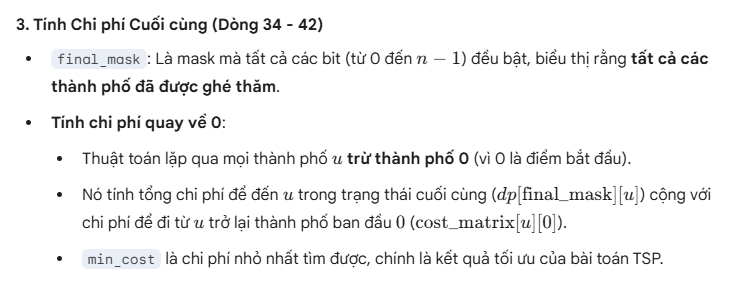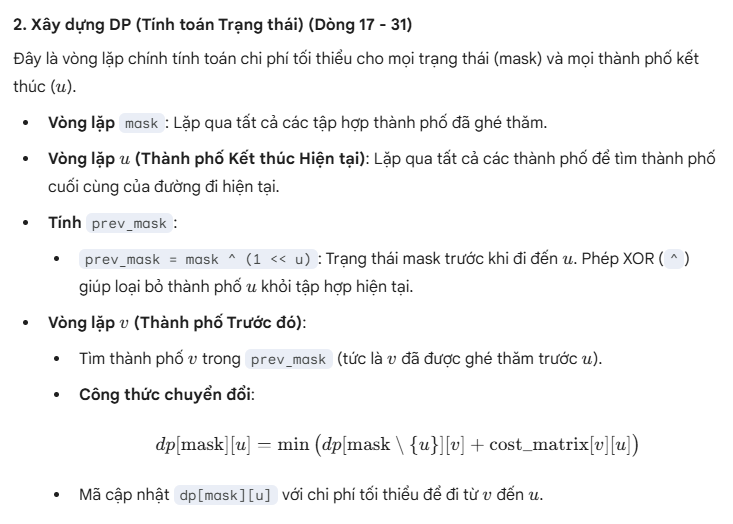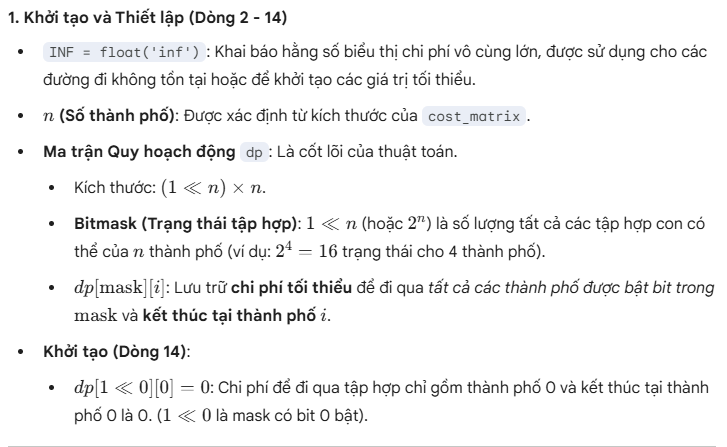